# DATA LOADING

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/output_with_priority.csv")
df.head()

,complaint_id,subject,date_received,date_sent_to_company,complaint,Topic,priority
0,3229299,write notification about debt,2019-05-01T12:00:00-05:00,2019-05-01T12:00:00-05:00,good morning my name be and I appreciate it ...,Payment and Billing,not urgent
1,3199379,other feature term or problem,2019-04-02T12:00:00-05:00,2019-04-02T12:00:00-05:00,I upgrade my card in 2018 and be tell by the...,Dispute reporting,not urgent
2,3233499,incorrect information on your report,2019-05-06T12:00:00-05:00,2019-05-06T12:00:00-05:00,chase card be report on 2019 however fraudulen...,Credit card Management,not urgent
3,3180294,incorrect information on your report,2019-03-14T12:00:00-05:00,2019-03-15T12:00:00-05:00,on 2018 while try to book a ticket I com...,Credit card Management,not urgent
4,3224980,manage an account,2019-04-27T12:00:00-05:00,2019-04-27T12:00:00-05:00,my grand son give I check for 160000 I deposit...,Retail Banking Operations,not urgent


# DATASET VISUALIZE

In [ ]:
df.head()

,complaint_id,subject,date_received,date_sent_to_company,complaint,Topic,priority,label
0,3229299,write notification about debt,2019-05-01T12:00:00-05:00,2019-05-01T12:00:00-05:00,good morning my name be and I appreciate it ...,Payment and Billing,not urgent,0
1,3199379,other feature term or problem,2019-04-02T12:00:00-05:00,2019-04-02T12:00:00-05:00,I upgrade my card in 2018 and be tell by the...,Dispute reporting,not urgent,0
2,3233499,incorrect information on your report,2019-05-06T12:00:00-05:00,2019-05-06T12:00:00-05:00,chase card be report on 2019 however fraudulen...,Credit card Management,not urgent,0
3,3180294,incorrect information on your report,2019-03-14T12:00:00-05:00,2019-03-15T12:00:00-05:00,on 2018 while try to book a ticket I com...,Credit card Management,not urgent,0
4,3224980,manage an account,2019-04-27T12:00:00-05:00,2019-04-27T12:00:00-05:00,my grand son give I check for 160000 I deposit...,Retail Banking Operations,not urgent,0


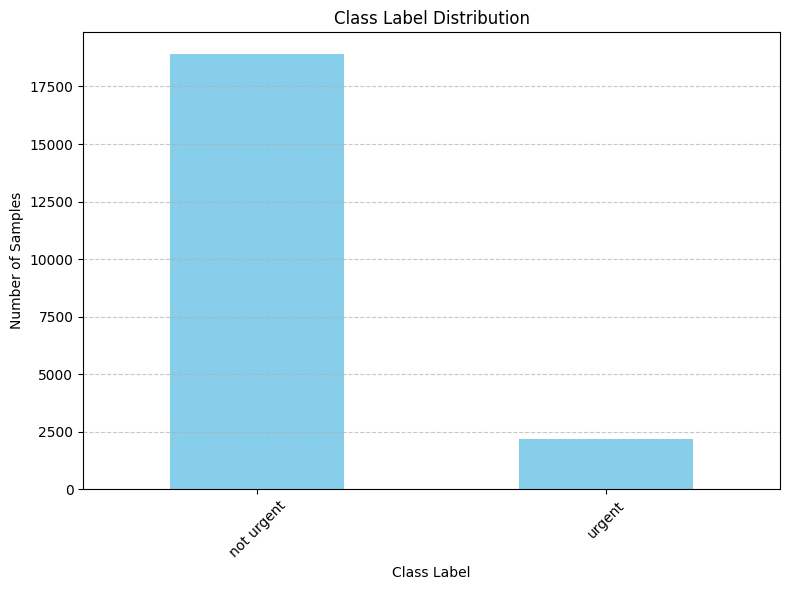

In [ ]:
import matplotlib.pyplot as plt

class_counts = df['priority'].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Label Distribution')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


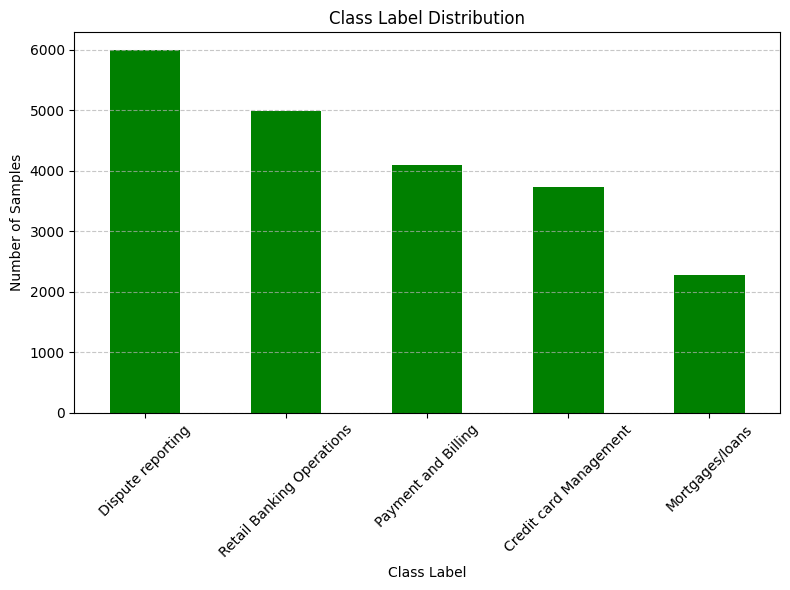

In [ ]:
import matplotlib.pyplot as plt

class_counts = df['Topic'].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='green')
plt.title('Class Label Distribution')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# RNN

model for department classification

In [ ]:
#Tokenization and padding
text_data = df['complaint'] + ' ' + df['subject']

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=100)

padded_sequences

array([[   0,    0,    0, ...,  515,   86,  169],
       [   0,    0,    0, ...,  271,   31,   98],
       [   0,    0,    0, ...,   14,   65,   47],
       ...,
       [   2,  626, 1636, ...,   36,   65,   17],
       [ 563,   26,    1, ...,  271,   31,   98],
       [  14,    7,   22, ...,  783,   13,   22]], dtype=int32)

In [ ]:
# Convert labels to categorical one-hot encoding
label_map = {label: idx for idx, label in enumerate(df['Topic'].unique())}
df['label'] = df['Topic'].map(label_map)
labels = tf.keras.utils.to_categorical(df['label'])

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [ ]:
model2 = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=32, input_length=100),
    layers.LSTM(units=64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    layers.LSTM(units=64, dropout=0.2, recurrent_dropout=0.2),  # Stacked LSTM layers
    layers.Dense(units=len(label_map), activation='softmax')  # Use softmax activation for multi-class classification
])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history1 = model2.fit(train_data, train_labels, epochs=10, batch_size=32)

Epoch 1/10
527/527 [==============================] - 150s 270ms/step - loss: 0.9054 - accuracy: 0.6581
Epoch 2/10
527/527 [==============================] - 137s 259ms/step - loss: 0.6568 - accuracy: 0.7632
Epoch 3/10
527/527 [==============================] - 138s 263ms/step - loss: 0.5345 - accuracy: 0.8147
Epoch 4/10
527/527 [==============================] - 138s 262ms/step - loss: 0.4712 - accuracy: 0.8391
Epoch 5/10
527/527 [==============================] - 139s 264ms/step - loss: 0.3954 - accuracy: 0.8688
Epoch 6/10
527/527 [==============================] - 139s 264ms/step - loss: 0.3474 - accuracy: 0.8843
Epoch 7/10
527/527 [==============================] - 139s 263ms/step - loss: 0.3077 - accuracy: 0.9005
Epoch 8/10
527/527 [==============================] - 141s 267ms/step - loss: 0.2833 - accuracy: 0.9057
Epoch 9/10
527/527 [==============================] - 140s 266ms/step - loss: 0.2795 - accuracy: 0.9094
Epoch 10/10
527/527 [==============================] - 141s 268m

In [ ]:
rnn_loss_dept , rnn_accuracy_dept = model2.evaluate(test_data, test_labels)
print(f'Test loss: {rnn_loss_dept}')
print(f'Test accuracy: {rnn_accuracy_dept}')

132/132 [==============================] - 6s 39ms/step - loss: 0.6276 - accuracy: 0.8045
Test loss: 0.6276402473449707
Test accuracy: 0.8045077323913574


In [ ]:
# Save the training history
train_loss = history1.history['loss']
train_accuracy = history1.history['accuracy']

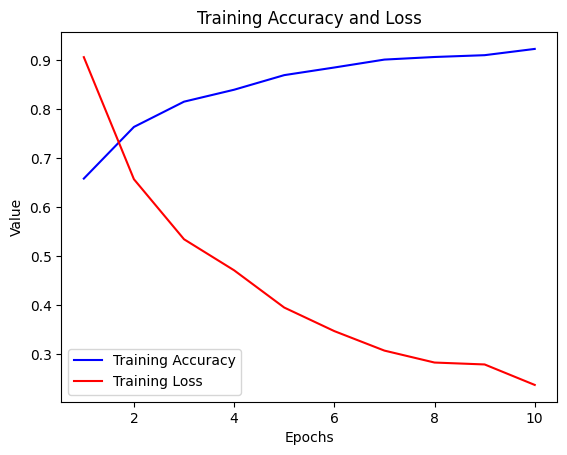

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, 'b-', label='Training Accuracy')
plt.plot(range(1, len(train_loss) + 1), train_loss, 'r-', label='Training Loss')
plt.title('Training Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

model for priority classification

In [ ]:
# Convert labels to categorical one-hot encoding
label_map = {label: idx for idx, label in enumerate(df['priority'].unique())}
df['label'] = df['priority'].map(label_map)
labels = tf.keras.utils.to_categorical(df['label'])
train_data, test_data, train_labels, test_labels = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [ ]:
model1 = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=32, input_length=100),
    layers.LSTM(units=64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    layers.LSTM(units=64, dropout=0.2, recurrent_dropout=0.2),  # Stacked LSTM layers
    layers.Dense(units=len(label_map), activation='softmax')  # Use softmax activation for multi-class classification
])
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history2 = model1.fit(train_data, train_labels, epochs=10, batch_size=32)

Epoch 1/10
527/527 [==============================] - 147s 264ms/step - loss: 0.3218 - accuracy: 0.8976
Epoch 2/10
527/527 [==============================] - 147s 279ms/step - loss: 0.2827 - accuracy: 0.9012
Epoch 3/10
527/527 [==============================] - 138s 262ms/step - loss: 0.2805 - accuracy: 0.9066
Epoch 4/10
527/527 [==============================] - 140s 266ms/step - loss: 0.3057 - accuracy: 0.8981
Epoch 5/10
527/527 [==============================] - 139s 264ms/step - loss: 0.3161 - accuracy: 0.8975
Epoch 6/10
527/527 [==============================] - 137s 260ms/step - loss: 0.3081 - accuracy: 0.8981
Epoch 7/10
527/527 [==============================] - 139s 263ms/step - loss: 0.2303 - accuracy: 0.9267
Epoch 8/10
527/527 [==============================] - 139s 264ms/step - loss: 0.1829 - accuracy: 0.9424
Epoch 9/10
527/527 [==============================] - 138s 262ms/step - loss: 0.1546 - accuracy: 0.9507
Epoch 10/10
527/527 [==============================] - 139s 263m

In [ ]:
rnn_loss_priority , rnn_accuracy_priority = model1.evaluate(test_data, test_labels)
print(f'Test loss: {rnn_loss_priority}')
print(f'Test accuracy: {rnn_accuracy_priority}')

132/132 [==============================] - 6s 44ms/step - loss: 0.2651 - accuracy: 0.9250
Test loss: 0.26513731479644775
Test accuracy: 0.9250296354293823


In [ ]:
# Save the training history
train_loss = history2.history['loss']
train_accuracy = history2.history['accuracy']

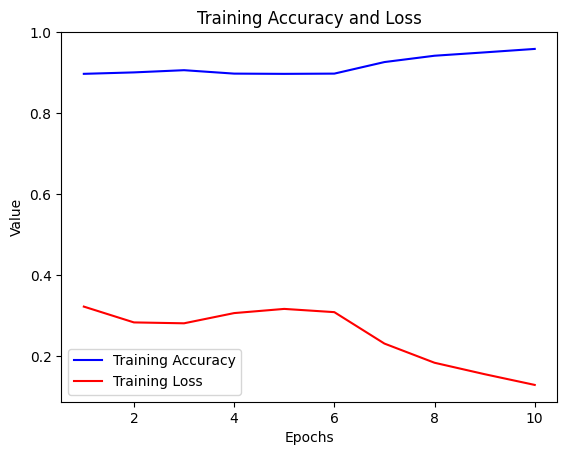

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, 'b-', label='Training Accuracy')
plt.plot(range(1, len(train_loss) + 1), train_loss, 'r-', label='Training Loss')
plt.title('Training Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

# CNN

model for department classification

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Tokenization and padding
text_data = df['complaint'] + ' ' + df['subject']

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=100)

In [ ]:
# Convert labels to categorical one-hot encoding
label_map = {label: idx for idx, label in enumerate(df['Topic'].unique())}
df['label'] = df['Topic'].map(label_map)
labels = tf.keras.utils.to_categorical(df['label'])
train_data, test_data, train_labels, test_labels = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=32, input_length=100),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(units=len(label_map), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history1 = model.fit(train_data, train_labels, epochs=10, batch_size=32)

Epoch 1/10
527/527 [==============================] - 10s 17ms/step - loss: 0.8058 - accuracy: 0.6865
Epoch 2/10
527/527 [==============================] - 8s 16ms/step - loss: 0.4732 - accuracy: 0.8239
Epoch 3/10
527/527 [==============================] - 8s 16ms/step - loss: 0.3755 - accuracy: 0.8640
Epoch 4/10
527/527 [==============================] - 9s 17ms/step - loss: 0.2884 - accuracy: 0.9003
Epoch 5/10
527/527 [==============================] - 8s 15ms/step - loss: 0.2111 - accuracy: 0.9317
Epoch 6/10
527/527 [==============================] - 9s 17ms/step - loss: 0.1480 - accuracy: 0.9587
Epoch 7/10
527/527 [==============================] - 9s 17ms/step - loss: 0.0954 - accuracy: 0.9772
Epoch 8/10
527/527 [==============================] - 8s 15ms/step - loss: 0.0603 - accuracy: 0.9899
Epoch 9/10
527/527 [==============================] - 9s 17ms/step - loss: 0.0355 - accuracy: 0.9961
Epoch 10/10
527/527 [==============================] - 9s 17ms/step - loss: 0.0201 - accur

In [ ]:
cnn_loss_dept, cnn_accuracy_dept = model.evaluate(test_data, test_labels)
print(f'Test loss: {cnn_loss_dept}')
print(f'Test accuracy: {cnn_accuracy_dept}')

132/132 [==============================] - 1s 4ms/step - loss: 0.6960 - accuracy: 0.8083
Test loss: 0.6959855556488037
Test accuracy: 0.8083036541938782


In [ ]:
# Save the training history
train_loss = history1.history['loss']
train_accuracy = history1.history['accuracy']

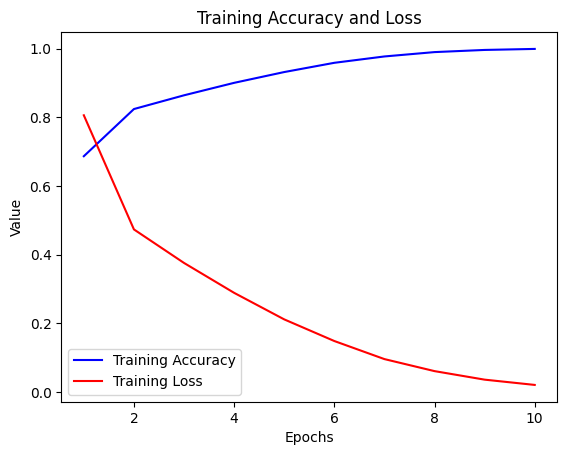

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, 'b-', label='Training Accuracy')
plt.plot(range(1, len(train_loss) + 1), train_loss, 'r-', label='Training Loss')
plt.title('Training Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

model for priority classification

In [ ]:
# Convert labels to categorical one-hot encoding
label_map = {label: idx for idx, label in enumerate(df['priority'].unique())}
df['label'] = df['priority'].map(label_map)
labels = tf.keras.utils.to_categorical(df['label'])
train_data, test_data, train_labels, test_labels = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=32, input_length=100),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(units=len(label_map), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history2 = model.fit(train_data, train_labels, epochs=10, batch_size=32)

Epoch 1/10
527/527 [==============================] - 10s 17ms/step - loss: 0.2944 - accuracy: 0.9069
Epoch 2/10
527/527 [==============================] - 8s 15ms/step - loss: 0.1876 - accuracy: 0.9394
Epoch 3/10
527/527 [==============================] - 9s 17ms/step - loss: 0.1373 - accuracy: 0.9495
Epoch 4/10
527/527 [==============================] - 9s 17ms/step - loss: 0.0836 - accuracy: 0.9694
Epoch 5/10
527/527 [==============================] - 8s 15ms/step - loss: 0.0423 - accuracy: 0.9867
Epoch 6/10
527/527 [==============================] - 9s 17ms/step - loss: 0.0172 - accuracy: 0.9960
Epoch 7/10
527/527 [==============================] - 8s 16ms/step - loss: 0.0065 - accuracy: 0.9993
Epoch 8/10
527/527 [==============================] - 10s 18ms/step - loss: 0.0031 - accuracy: 0.9998
Epoch 9/10
527/527 [==============================] - 9s 17ms/step - loss: 0.0021 - accuracy: 0.9998
Epoch 10/10
527/527 [==============================] - 9s 16ms/step - loss: 0.0012 - accu

In [ ]:
cnn_loss_priority, cnn_accuracy_priority = model.evaluate(test_data, test_labels)
print(f'Test loss: {cnn_loss_priority}')
print(f'Test accuracy: {cnn_accuracy_priority}')

132/132 [==============================] - 1s 4ms/step - loss: 0.6118 - accuracy: 0.9155
Test loss: 0.6117944121360779
Test accuracy: 0.9155397415161133


In [ ]:
# Save the training history
train_loss = history2.history['loss']
train_accuracy = history2.history['accuracy']

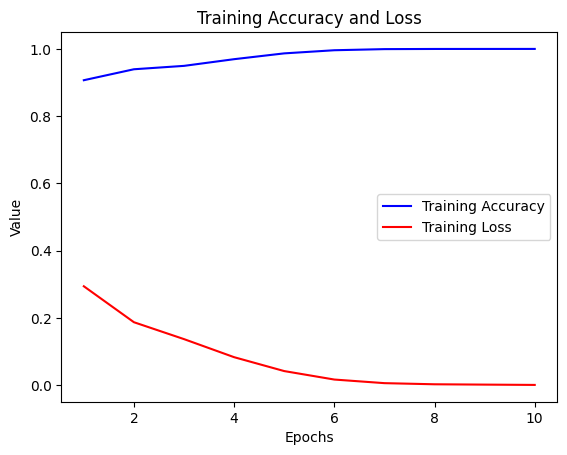

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, 'b-', label='Training Accuracy')
plt.plot(range(1, len(train_loss) + 1), train_loss, 'r-', label='Training Loss')
plt.title('Training Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

# VISUALISATION

In [ ]:
bert_accuracy_dept = 0.8100296354293823
bert_accuracy_priority = 0.9263542502993823

In [ ]:
from tabulate import tabulate


accuracies = [
    ("RNN", rnn_accuracy_dept),
    ("CNN", cnn_accuracy_dept),
    ("BERT", bert_accuracy_dept),

]
print(tabulate(accuracies, headers=["Model", "Accuracy"], tablefmt="grid"))

+---------+------------+
| Model   |   Accuracy |
+=========+============+
| RNN     |   0.804508 |
+---------+------------+
| CNN     |   0.808304 |
+---------+------------+
| BERT    |   0.81003  |
+---------+------------+


In [ ]:
from tabulate import tabulate

accuracies = [
    ("RNN", rnn_accuracy_priority),
    ("CNN", cnn_accuracy_priority),
    ("BERT", bert_accuracy_priority),
]

print(tabulate(accuracies, headers=["Model", "Accuracy"], tablefmt="grid"))

+---------+------------+
| Model   |   Accuracy |
+=========+============+
| RNN     |   0.92503  |
+---------+------------+
| CNN     |   0.91554  |
+---------+------------+
| BERT    |   0.926354 |
+---------+------------+


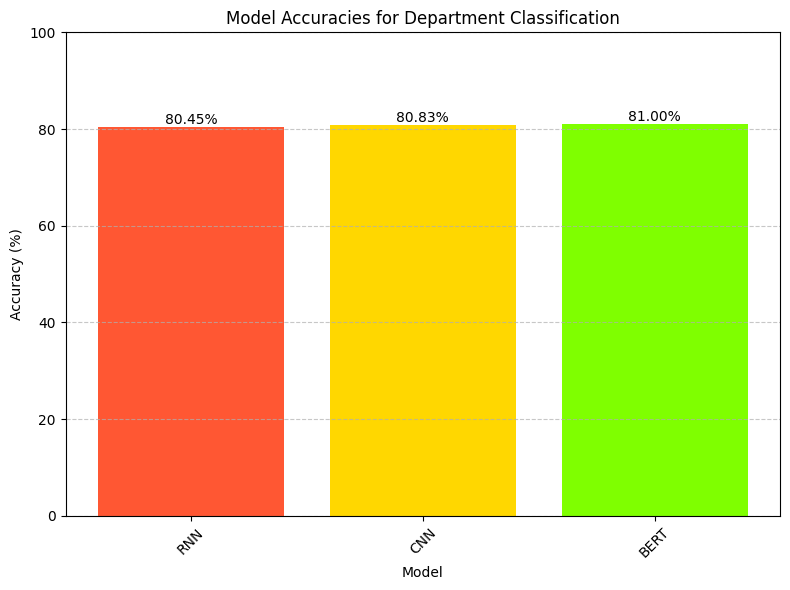

In [ ]:
import matplotlib.pyplot as plt

models = ["RNN", "CNN", "BERT"]
accuracies = [rnn_accuracy_dept, cnn_accuracy_dept, bert_accuracy_dept]
accuracies_percent = [accuracy * 100 for accuracy in accuracies]

colors = ['#FF5733', '#FFD700', '#7FFF00']

plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies_percent, color=colors)
plt.title('Model Accuracies for Department Classification')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, accuracy in zip(bars, accuracies_percent):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{accuracy:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


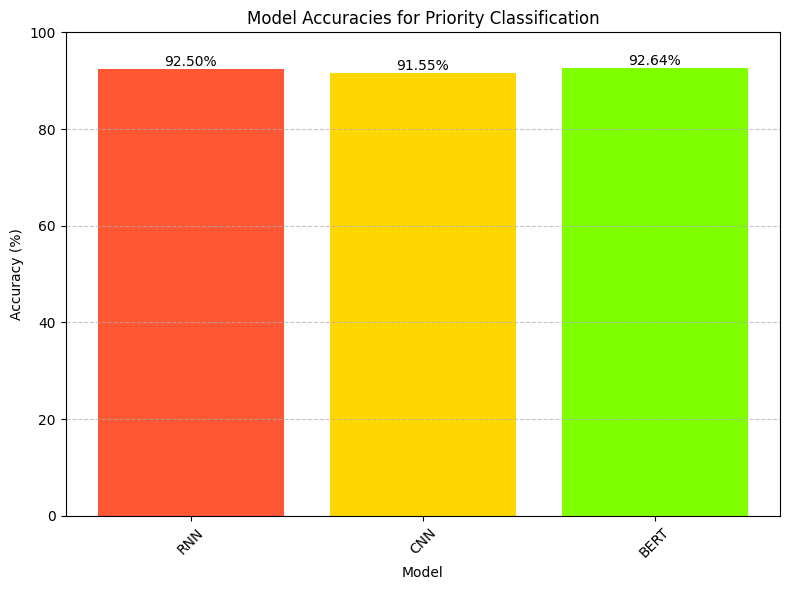

In [ ]:
import matplotlib.pyplot as plt

models = ["RNN", "CNN", "BERT"]
accuracies = [rnn_accuracy_priority, cnn_accuracy_priority, bert_accuracy_priority]
accuracies_percent = [accuracy * 100 for accuracy in accuracies]

colors = ['#FF5733', '#FFD700', '#7FFF00']

plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies_percent, color=colors)
plt.title('Model Accuracies for Priority Classification')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, accuracy in zip(bars, accuracies_percent):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{accuracy:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()
